In [1]:
import xgboost
import sklearn
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.DataFrame(pd.read_csv("vending_machine_sales.csv"))

display(df)

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9612,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Nacho Cheese,Food,16175373362,12/30/2022,Cash,112,1.5,1,112,1.5,1,1.5,1.5,12/30/2022
9613,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176802941,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022
9614,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Robert Irvine's - Fit Crunch - Chocolate Pea,Food,16176909481,12/31/2022,Cash,137,2.0,1,137,2.0,1,2.0,2.0,12/31/2022
9615,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176914301,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022


In [3]:
# we set index to the data column, make this a time series. 
# df.set_index('Prcd Date')
# display()  facing issues, no real use. the index is in time series form i guess. 

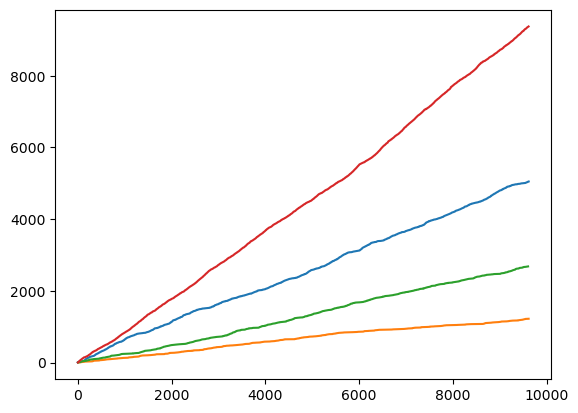

In [4]:
carbonated = df[df['Category'] == "Carbonated"]
food = df[df['Category'] == "Food"]
water = df[df['Category'] == "Water"]
non_carbonated = df[df['Category'] == "Non Carbonated"]

plt.plot(carbonated.index,carbonated['LineTotal'].cumsum(),water.index,water['LineTotal'].cumsum(),non_carbonated.index,non_carbonated['LineTotal'].cumsum(),food.index,food['LineTotal'].cumsum())

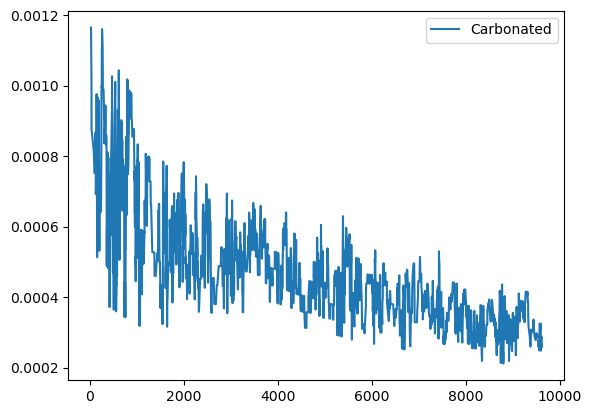

In [5]:
average = carbonated['LineTotal'].cumsum().mean()
carbonated.loc[0,'LineTotal'] = average
plt.plot(carbonated.index, carbonated['LineTotal'].cumsum().pct_change().rolling(7).mean(), label="Carbonated")



plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


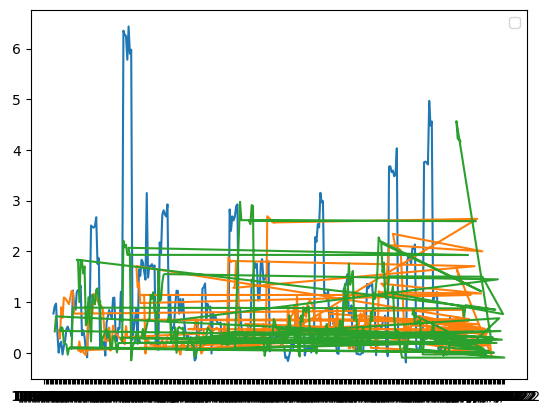

In [6]:
# Carbonated
daily_carbonated = carbonated.groupby('Prcd Date')['LineTotal'].sum()
growth_carbonated = daily_carbonated.pct_change().rolling(7).mean()
plt.plot(daily_carbonated.index, growth_carbonated)

# Water
daily_water = water.groupby('Prcd Date')['LineTotal'].sum()
growth_water = daily_water.pct_change().rolling(7).mean()
plt.plot(daily_water.index, growth_water)

# # Food
# daily_food = food.groupby('Prcd Date')['LineTotal'].sum()
# growth_food = daily_food.pct_change().rolling(7).mean()
# plt.plot(daily_food.index, growth_food, label="Food")

# Non Carbonated
daily_non_carbonated = non_carbonated.groupby('Prcd Date')['LineTotal'].sum()
growth_non_carbonated = daily_non_carbonated.pct_change().rolling(7).mean()
plt.plot(daily_non_carbonated.index, growth_non_carbonated)

plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


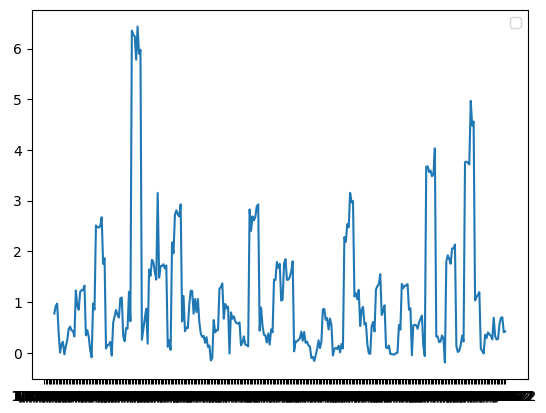

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


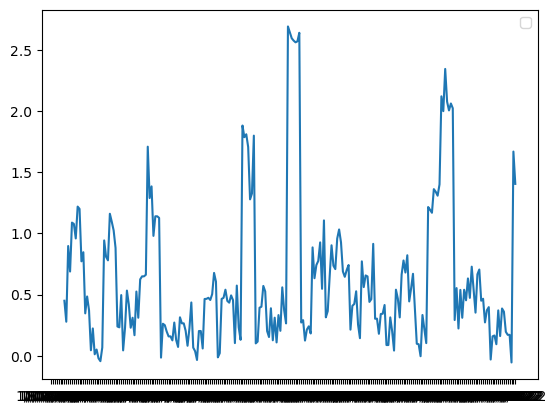

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


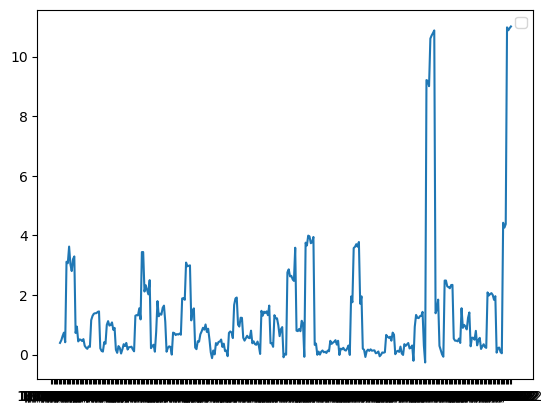

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


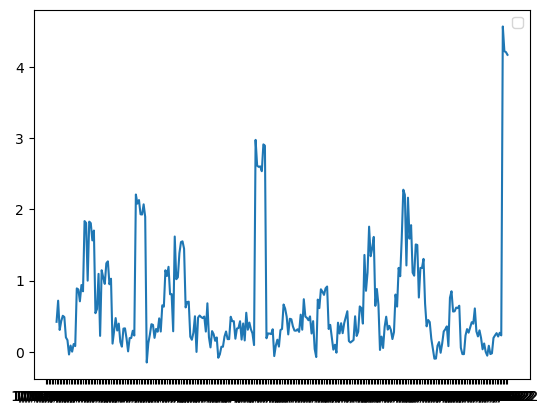

In [7]:
categories = [carbonated,water,food,non_carbonated] 
for c in categories : 
    daily = c.groupby('Prcd Date')['LineTotal'].sum() 
    growth = daily.pct_change().rolling(7).mean() 
    plt.plot(daily.index, growth) 
    plt.legend() 
    plt.show()

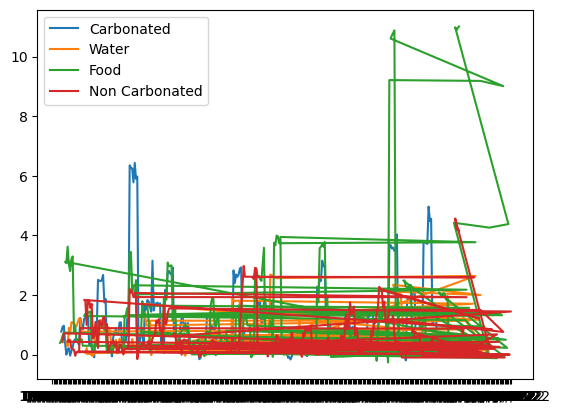

In [8]:
categories = [carbonated, water, food, non_carbonated] 
labels = ["Carbonated", "Water", "Food", "Non Carbonated"]

for c, label in zip(categories, labels): 
    daily = c.groupby('Prcd Date')['LineTotal'].sum() 
    growth = daily.pct_change().rolling(7).mean() 
    plt.plot(daily.index, growth, label=label) 

plt.legend() 
plt.show()


In [9]:
categories = [carbonated,water,food,non_carbonated] 
for c in categories : 
    daily = c.groupby[c.index]['LineTotal'].sum() 
    growth = daily.pct_change().rolling(7).mean() 
    plt.plot(daily.index, growth) 
    plt.legend() 
    plt.show()

categories = [carbonated,water,food,non_carbonated] 
for c in categories : 
    daily = c.groupby('Prcd Date')['LineTotal'].sum() 
    growth = daily.pct_change().rolling(7).mean() 
    plt.plot(daily.index, growth) 
    plt.legend() 
    plt.show()


TypeError: 'method' object is not subscriptable

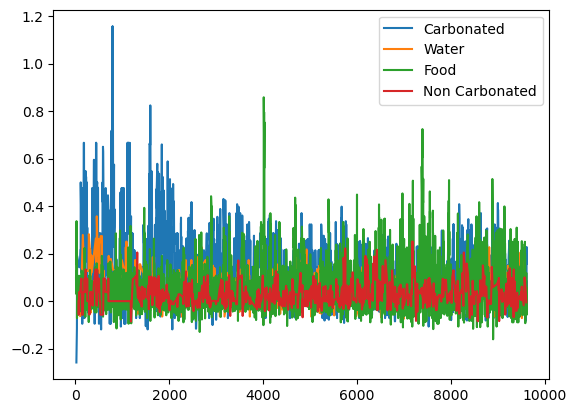

In [10]:
categories = [carbonated, water, food, non_carbonated]

for c in categories:
    daily = c.groupby(c.index)['LineTotal'].sum()
    growth = daily.pct_change().rolling(7).mean()
    plt.plot(daily.index, growth)

plt.legend(["Carbonated", "Water", "Food", "Non Carbonated"])
plt.show()


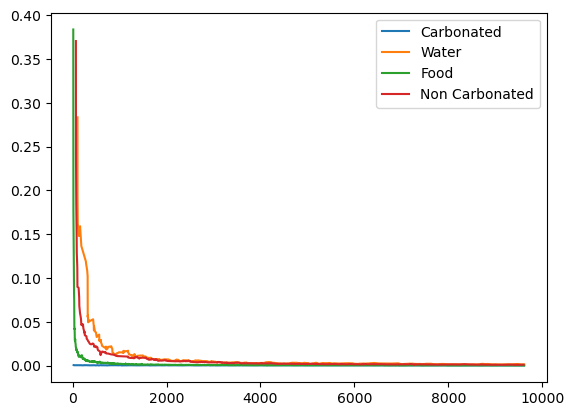

In [ ]:
categories = [carbonated, water, food, non_carbonated]
labels = ["Carbonated", "Water", "Food", "Non Carbonated"]

for c, label in zip(categories, labels):
    growth = c['LineTotal'].cumsum().pct_change().rolling(7).mean()
    plt.plot(c.index, growth, label=label)

plt.legend()
plt.show()

# Data:

everything is a mess for now. It is going to be hard, but the cumulative sum of the sales might be used rather than sales alone. we could also just try and have the model predict for profit for now. multiply the price by sales for each product and we have revenue per sale. so, we can use that aswell. if we 